# Codigo de Analisis MT5 para modelos estocasticos

In [14]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import MetaTrader5 as mt5
from datetime import datetime as dt
import datetime as dat
import numpy as np
from Informacion import Informacion
from Inicializar import IniciarMT5
import scipy as sp
from Formulas import Stocastic_Hesston
IniciarMT5()

Inicializacion Completa


c:\Users\Miguel\Documents\Metatrader\Algoritmos\Formulas.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[a] = S


Alza:  0.9288888888888889
Baja:  0.07111111111111111


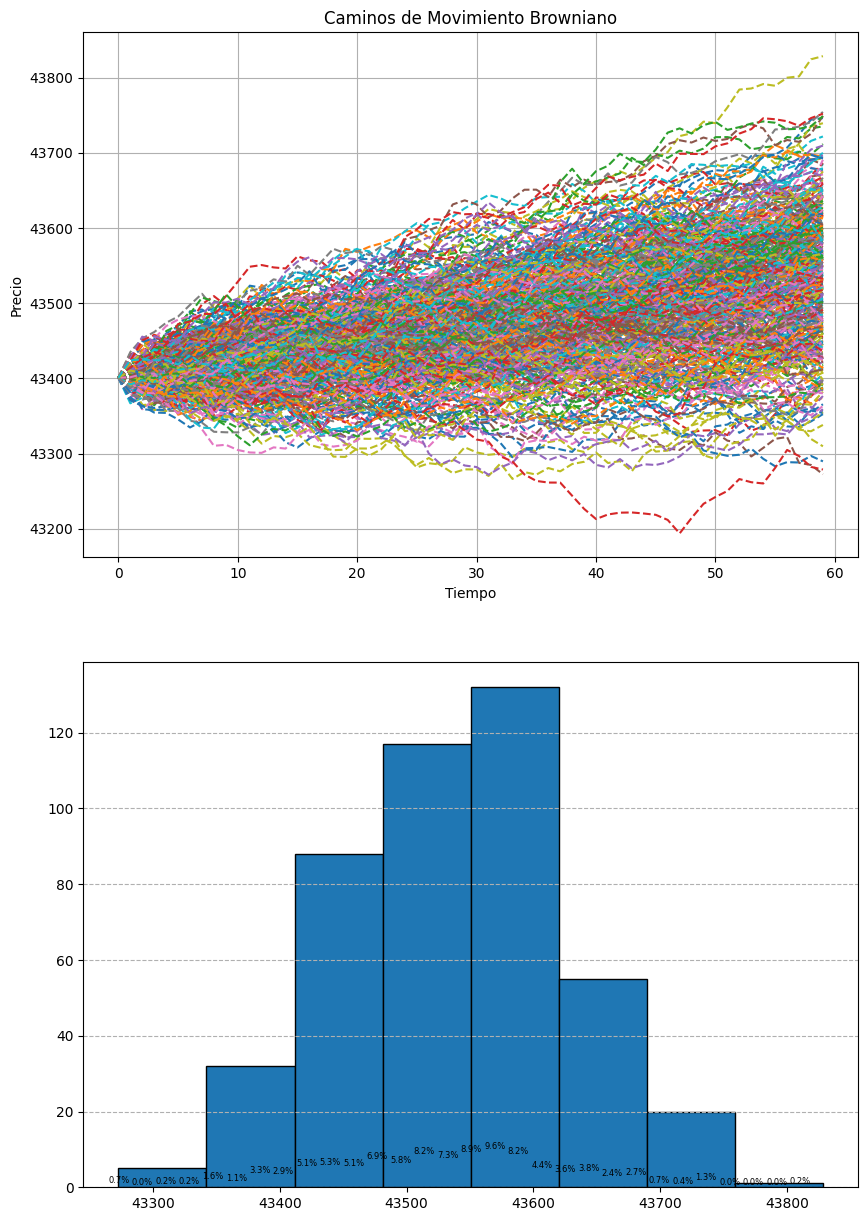

In [30]:
datos = Informacion("BTCUSD", 5000 , "M5")
Stocastic_Hesston(datos, paths= 450, Ventana= 60, T = 1)

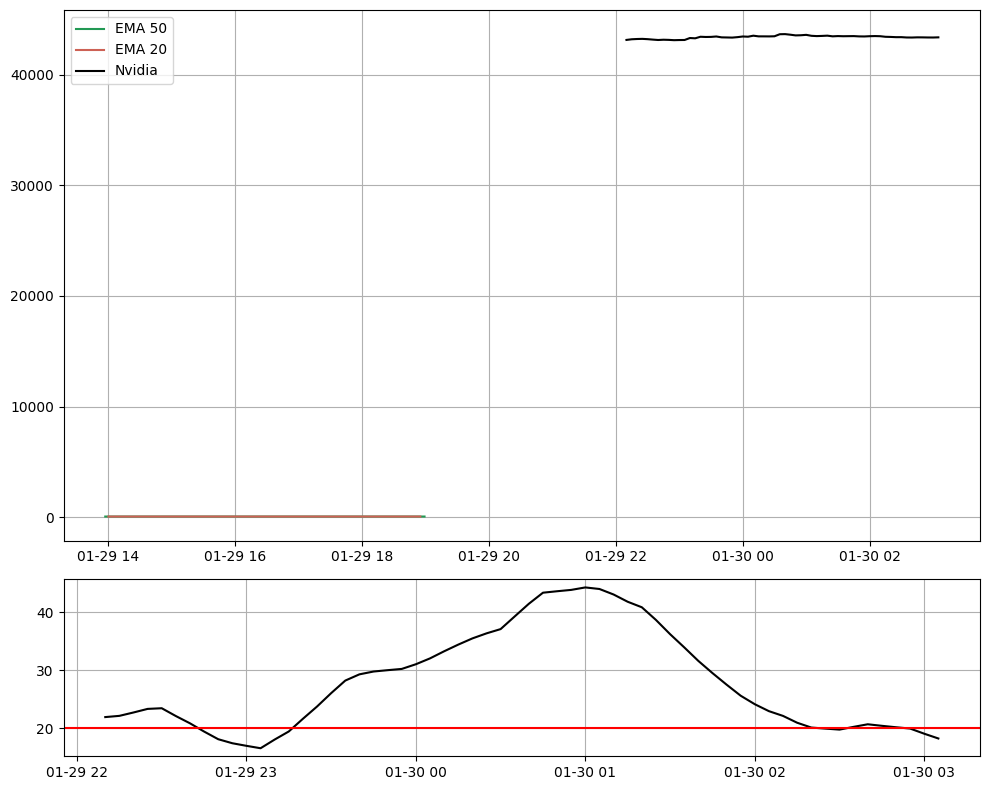

In [31]:
from Formulas import EMA
from ta.trend import ADXIndicator
import matplotlib.dates as mdates

datos = Informacion("BTCUSD", 5000 , "M5")
adx = ADXIndicator(datos['high'],datos['low'],datos['close'], window= 14).adx()
medexp50 = EMA('Intel','M1',50, 5000)
medexp20 = EMA('Intel', 'M5',20, 5000)
t = 60
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})
ax1.plot(medexp50.iloc[-t*5:], color = '#229954', label = 'EMA 50')
ax1.plot(medexp20.iloc[-t:], color = '#CD6155', label = 'EMA 20')
ax1.plot(datos['close'].iloc[-t:], color = 'black', label = 'Nvidia')
ax1.grid()
ax1.legend()
ax2.plot(adx[-t:], color = 'black')
ax2.axhline(y = 20, color = 'red')
ax2.grid()
fig.tight_layout()
locator = mdates.AutoDateLocator()
locator.intervald[mdates.WEEKDAYS] = [0]  # Solo se permite una marca por semana
formatter = mdates.AutoDateFormatter(locator)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)
plt.show()

In [17]:
tot = 1500
datos = Informacion("Nvidia", tot , "H1")
medexp50 = EMA('Nvidia','M1',50,tot*5).reset_index()
medexp20 = EMA('Nvidia', 'M5',20,tot).reset_index()
adx = ADXIndicator(datos['high'],datos['low'],datos['close'], window= 14).adx().reset_index()
# Fusionar DataFrames en función de las fechas
df = pd.merge(medexp50, medexp20, on='time', how='outer', suffixes=('_50', '_20'))
df = pd.merge(df, adx, on='time', how='outer')
df = pd.merge(df, datos['close'].reset_index(), on = 'time', how = 'outer')
df.dropna(axis = 0, inplace= True)
df.sort_values('time', ascending= False, inplace= True)

algorithmo = []
for i in range(len(df)):
    if df.iloc[i]['close_50'] > df.iloc[i]['close_20'] and df.iloc[i]['adx'] > 22:
        algorithmo.append(1)
    else:
        algorithmo.append(0)
df['Superado'] = algorithmo

In [18]:
df['resultado'] = df['close'] - df['close'].shift(1)
(df['resultado']* df['Superado']).sum()

-50.960000000000036

In [19]:
partidas = 30000
datos = Informacion('BTCUSD', partidas,'M5')
datos.sort_index(ascending= True, inplace= True)
from ta.trend import AroonIndicator
from ta.momentum import rsi
datos['Aind'] = AroonIndicator(datos['high'],datos['low'], window = 14).aroon_indicator()
datos['RSI'] = rsi(datos['close'], window = 14)
 

In [20]:
algorithmo = []
for i in range(len(datos)):
    abs = datos.iloc[i]
    if abs['Aind'] > 0 and abs['RSI'] < 30:
        algorithmo.append(-1)
    elif abs['Aind'] < 0 and abs['RSI'] > 70:
        algorithmo.append(1)
    else:
        algorithmo.append(0)
datos['retorno'] = datos['close'] - datos['close'].shift(1)
datos['funcion'] = algorithmo
datos.dropna(axis = 0, inplace= True)


x = 0
algoth = []
while x < len(datos):
    if datos.iloc[x]['funcion'] != 0:
        algoth.append(datos.iloc[x]['funcion'])
        algoth.append(datos.iloc[x]['funcion'])
        algoth.append(datos.iloc[x]['funcion'])
        algoth.append(datos.iloc[x]['funcion'])
        algoth.append(datos.iloc[x]['funcion'])
        algoth.append(datos.iloc[x]['funcion'])
        algoth.append(datos.iloc[x]['funcion'])
        algoth.append(datos.iloc[x]['funcion'])
        algoth.append(datos.iloc[x]['funcion'])
        algoth.append(datos.iloc[x]['funcion'])
        x += 10
    else:
        algoth.append(0)
        x += 1

datos['funcion'] = algoth
datos['dinero'] = datos['retorno'] * datos['funcion']
print(datos['dinero'].sum())

826.5299999999916


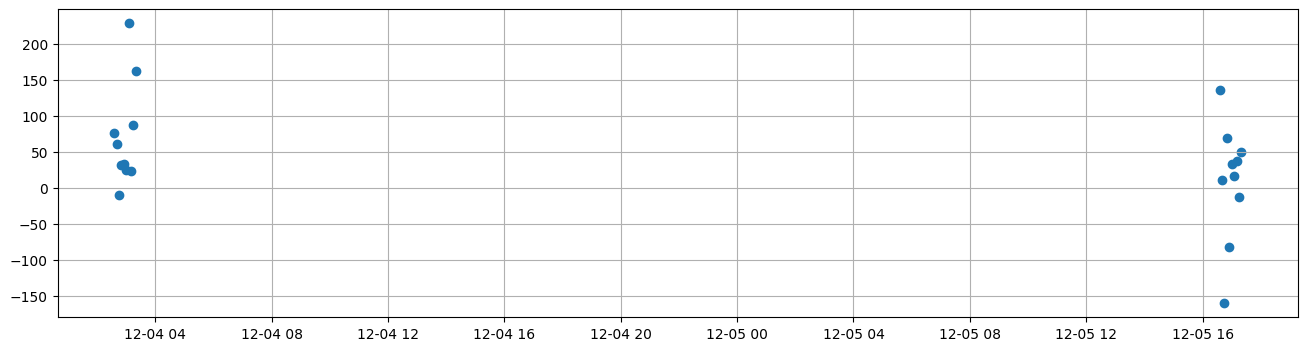

In [21]:
plt.figure(figsize=(16,4))
plt.scatter(datos[datos['funcion'] != 0].index,datos[datos['funcion'] != 0]['dinero'])
plt.grid()
plt.show()